In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os, shutil
import numpy as np
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.metrics import accuracy_score
import torchvision.models as models
from sklearn.decomposition import PCA

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
data_transform = transforms.Compose([
     transforms.Resize([224,224]),
#     transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
#     transforms.RandomRotation(degrees=15),#随机旋转15°
#     transforms.RandomHorizontalFlip(),#随机水平翻转图片
    #transforms.CenterCrop(80),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [4]:
all_dataset= torchvision.datasets.ImageFolder(root='dataset',transform=data_transform)

In [5]:
train_size = int(len(all_dataset) * 0.7)
test_size = len(all_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(all_dataset, [train_size, test_size])

In [6]:
class_names = all_dataset.classes
print(class_names)

['hunzhuo', 'tuoli']


In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=20, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True,)

In [8]:
train_data, train_labels = next(iter(train_loader))
print(u'train_data个数{}'.format(len(train_data)))
print(u'train_labels个数{}'.format(len(train_labels)))
print(train_data.shape)

train_data个数20
train_labels个数20
torch.Size([20, 3, 224, 224])


In [9]:
import timm
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes = 2)

In [10]:
criterion=nn.CrossEntropyLoss()
params = filter(lambda p: p.requires_grad, model.parameters())
opti = torch.optim.Adam(params, lr=1e-5)

In [11]:
EPOCH=5

In [12]:
model = model.to(device)

In [13]:
if __name__ =='__main__':
    Accuracy_list = []
    Loss_list = []
 
    for epoch in range(EPOCH):
        sum_loss = 0.0
        correct1 = 0
 
        total1 = 0
        for i,(images,labels) in enumerate(train_loader):
            num_images=images.size(0)
 
            images=Variable(images.to(device))
            labels=Variable(labels.to(device))
 
            out=model(images)
            _, predicted = torch.max(out.data, 1)
            total1 += labels.size(0)
 
            correct1 += (predicted == labels).sum().item()
 
 
            loss=criterion(out,labels)
            print(loss)
            opti.zero_grad()
            loss.backward()
            opti.step()
 
            
            sum_loss += loss.item()
            if i % 2 == 0:
                print('[%d, %d] loss: %.03f'
                      % (epoch + 1, i + 1, sum_loss / 100))
                sum_loss = 0.0
        Accuracy_list.append(100.0*correct1 / total1)
        print('accurary={}'.format(100.0*correct1 / total1))
        Loss_list.append(loss.item())

tensor(0.7587, device='cuda:0', grad_fn=<NllLossBackward0>)
[1, 1] loss: 0.008
tensor(1.4470, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4966, device='cuda:0', grad_fn=<NllLossBackward0>)
[1, 3] loss: 0.029
tensor(1.4040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6179, device='cuda:0', grad_fn=<NllLossBackward0>)
[1, 5] loss: 0.020
tensor(0.7311, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3133, device='cuda:0', grad_fn=<NllLossBackward0>)
[1, 7] loss: 0.020
tensor(0.9915, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4854, device='cuda:0', grad_fn=<NllLossBackward0>)
[1, 9] loss: 0.015
tensor(0.6675, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5759, device='cuda:0', grad_fn=<NllLossBackward0>)
[1, 11] loss: 0.022
tensor(0.9757, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5268, device='cuda:0', grad_fn=<NllLossBackward0>)
[1, 13] loss: 0.015
tensor(0.4029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1421, device='cu

In [14]:
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import type_of_target

from sklearn.metrics import precision_score, recall_score, f1_score
def computeTestSetAccuracy(model, loss_function):
#     device = torch.device("cuda:5" if torch.cuda.is_available() else "cpu")
    test_acc = 0.0
    test_loss = 0.0
    precision =0.0
    recall = 0.0
    f1score = 0.0
    predlabel_list =[]
    pred_list = []
    with torch.no_grad():
        model.eval()
 
        for j, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            a = labels.tolist()
            
            for x in a:
#                 print(type(x))
                predlabel_list.append(x)
            
            outputs = model(inputs)
 
            loss = loss_function(outputs, labels)
 
            test_loss += loss.item() * inputs.size(0)
 
            ret, predictions = torch.max(outputs.data, 1)
    
            b = predictions.tolist()
            for z in b:
                pred_list.append(z)
                
            correct_counts = predictions.eq(labels.data.view_as(predictions))
 
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
 
            test_acc += acc.item() * inputs.size(0)
 
            print("Test Batch Number: {:03d}, Test: Loss: {:.4f}, Accuracy: {:.4f}".format(
                j, loss.item(), acc.item()
            ))
#             for j in range(inputs.size()[0]):
#                 print("model {} pred label:{}, true label:{}".format(len(predictions), class_names[predictions[j]], class_names[labels[j]]))
#                 if predictions[j] != labels[j]:
#                     img = inputs[j].cpu().numpy()
#                     img = img*0.5+0.5
#                     img = img*255
#                     img = img.transpose([1,2,0])
#                     img =img.astype(np.uint8)
#                     plt.imshow(img)
#                     plt.show()
#     print(predlabel_list)      
    test_data_size = len(test_dataset)
    avg_test_loss = test_loss/test_data_size
    avg_test_acc = test_acc/test_data_size
    p = precision_score(predlabel_list, pred_list)  
    r = recall_score(predlabel_list, pred_list)  
    f1 = f1_score(predlabel_list, pred_list) 
    print('precision:'+str(p))
    print('recall:'+str(r))
    print('f1-score:'+str(f1)) 
    print("Test accuracy : " + str(avg_test_acc))
#     class_report = classification_report(predlabel_list,pred_list,target_names=['class 0','class 1'])
#     print(class_report)

In [15]:
computeTestSetAccuracy(model, criterion)

Test Batch Number: 000, Test: Loss: 0.2667, Accuracy: 0.9000
Test Batch Number: 001, Test: Loss: 0.0517, Accuracy: 1.0000
Test Batch Number: 002, Test: Loss: 0.1382, Accuracy: 0.9000
Test Batch Number: 003, Test: Loss: 0.7647, Accuracy: 0.7000
Test Batch Number: 004, Test: Loss: 0.1610, Accuracy: 0.9000
Test Batch Number: 005, Test: Loss: 0.5593, Accuracy: 0.9000
Test Batch Number: 006, Test: Loss: 0.4114, Accuracy: 0.8000
Test Batch Number: 007, Test: Loss: 0.3444, Accuracy: 0.8000
Test Batch Number: 008, Test: Loss: 0.0261, Accuracy: 1.0000
Test Batch Number: 009, Test: Loss: 0.0236, Accuracy: 1.0000
Test Batch Number: 010, Test: Loss: 0.0646, Accuracy: 1.0000
Test Batch Number: 011, Test: Loss: 0.0157, Accuracy: 1.0000
Test Batch Number: 012, Test: Loss: 0.0991, Accuracy: 1.0000
Test Batch Number: 013, Test: Loss: 0.0216, Accuracy: 1.0000
precision:0.9230769230769231
recall:0.9090909090909091
f1-score:0.9160305343511451
Test accuracy : 0.917910441533843


In [16]:
from PIL import Image
import cv2

In [17]:
# !pip install opencv-python

## 注意力图

In [18]:
def grad_rollout(attentions, gradients, discard_ratio):
    result = torch.eye(attentions[0].size(-1))
    with torch.no_grad():
        for attention, grad in zip(attentions, gradients):                
            weights = grad
            attention_heads_fused = (attention*weights).mean(axis=1)
            attention_heads_fused[attention_heads_fused < 0] = 0

            # Drop the lowest attentions, but
            # don't drop the class token
            flat = attention_heads_fused.view(attention_heads_fused.size(0), -1)
            _, indices = flat.topk(int(flat.size(-1)*discard_ratio), -1, False)
            #indices = indices[indices != 0]
            flat[0, indices] = 0

            I = torch.eye(attention_heads_fused.size(-1))
            a = (attention_heads_fused + 1.0*I)/2
            a = a / a.sum(dim=-1)
            result = torch.matmul(a, result)
    
    # Look at the total attention between the class token,
    # and the image patches
    mask = result[0, 0 , 1 :]
    # In case of 224x224 image, this brings us from 196 to 14
    width = int(mask.size(-1)**0.5)
    mask = mask.reshape(width, width).numpy()
    mask = mask / np.max(mask)
    return mask    

class VITAttentionGradRollout:
    def __init__(self, model, attention_layer_name='attn_drop',
        discard_ratio=0.9):
        self.model = model
        self.discard_ratio = discard_ratio
        for name, module in self.model.named_modules():
            if attention_layer_name in name:
                module.register_forward_hook(self.get_attention)
                module.register_backward_hook(self.get_attention_gradient)

        self.attentions = []
        self.attention_gradients = []

    def get_attention(self, module, input, output):
        self.attentions.append(output.cpu())

    def get_attention_gradient(self, module, grad_input, grad_output):
        self.attention_gradients.append(grad_input[0].cpu())

    def __call__(self, input_tensor, category_index):
        self.model.zero_grad()
        output = self.model(input_tensor)
        category_mask = torch.zeros(output.size())
        category_mask[:, category_index] = 1
        loss = (output*category_mask).sum()
        loss.backward()

        return grad_rollout(self.attentions, self.attention_gradients,
            self.discard_ratio)

In [19]:
def rollout(attentions, discard_ratio, head_fusion):
    result = torch.eye(attentions[0].size(-1))
    with torch.no_grad():
        for attention in attentions:
            if head_fusion == "mean":
                attention_heads_fused = attention.mean(axis=1)
            elif head_fusion == "max":
                attention_heads_fused = attention.max(axis=1)[0]
            elif head_fusion == "min":
                attention_heads_fused = attention.min(axis=1)[0]
            else:
                raise "Attention head fusion type Not supported"

            # Drop the lowest attentions, but
            # don't drop the class token
            flat = attention_heads_fused.view(attention_heads_fused.size(0), -1)
            _, indices = flat.topk(int(flat.size(-1)*discard_ratio), -1, False)
            indices = indices[indices != 0]
            flat[0, indices] = 0

            I = torch.eye(attention_heads_fused.size(-1))
            a = (attention_heads_fused + 1.0*I)/2
            a = a / a.sum(dim=-1)

            result = torch.matmul(a, result)
    
    # Look at the total attention between the class token,
    # and the image patches
    mask = result[0, 0 , 1 :]
    # In case of 224x224 image, this brings us from 196 to 14
    width = int(mask.size(-1)**0.5)
    mask = mask.reshape(width, width).numpy()
    mask = mask / np.max(mask)
    return mask    

class VITAttentionRollout:
    def __init__(self, model, attention_layer_name='attn_drop', head_fusion="mean",
        discard_ratio=0.9):
        self.model = model
        self.head_fusion = head_fusion
        self.discard_ratio = discard_ratio
        for name, module in self.model.named_modules():
            if attention_layer_name in name:
                module.register_forward_hook(self.get_attention)

        self.attentions = []

    def get_attention(self, module, input, output):
        self.attentions.append(output.cpu())

    def __call__(self, input_tensor):
        self.attentions = []
        with torch.no_grad():
            output = self.model(input_tensor)

        return rollout(self.attentions, self.discard_ratio, self.head_fusion)

In [20]:
def show_mask_on_image(img, mask):
    img = np.float32(img) / 255
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model.to(device)

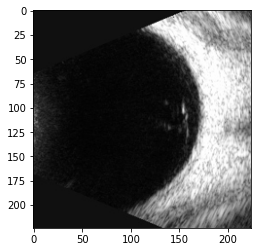

In [22]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])
img = Image.open('dataset/hunzhuo/hunzhuo0.jpg')
img = img.resize((224, 224))
input_tensor = transform(img).unsqueeze(0)
plt.imshow(img)
plt.show()

In [23]:
input_tensor = input_tensor.cuda()
print("Doing Attention Rollout")
attention_rollout = VITAttentionRollout(model, head_fusion='mean', 
discard_ratio=0.9)
mask = attention_rollout(input_tensor)
name = "attention_rollout_{:.3f}_{}.png".format(0.9, max)

Doing Attention Rollout


In [24]:
np_img = np.array(img)[:, :, ::-1]
mask = cv2.resize(mask, (np_img.shape[1], np_img.shape[0]))
mask = show_mask_on_image(np_img, mask)
# cv2.imshow("Input Image", np_img)
# cv2.imshow(name, mask)
# # cv2.imwrite("input.png", np_img)
# # cv2.imwrite(name, mask)
# cv2.waitKey(-1)

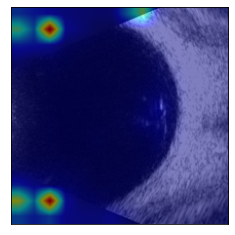

In [25]:
b,g,r = cv2.split(mask)			#分别提取B、G、R通道
img_new1 = cv2.merge([r,g,b])
plt.imshow(img_new1)
plt.xticks([]), plt.yticks([]) 
plt.savefig('hunzhuo VIT')
plt.show()